In [5]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
import numpy as np
import statistics as stat
from enhancement_analysis import *
from fit_functions import *
from low_level import readCSVrows,writeCSVrows,calcEnhancement
%matplotlib inline


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

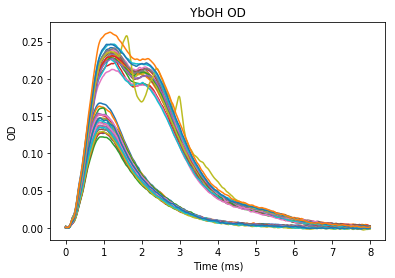

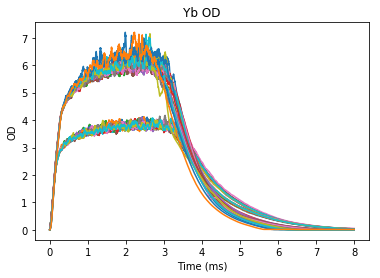

In [6]:
folder = '20190307'
skips = []
ABAB = True

start_stop = [
    [6367,6386],
    [6387,6408]
]

power = [75,465]

enhancement = []

b_ODs = []
ub_ODs = []

for i in range(len(start_stop)):
    start,stop = start_stop[i]
    ODs_1 = calculateSeriesOD(folder,start,stop,skips,ABAB=ABAB)
    ODs_2 = calculateSeriesOD(folder,start+1,stop,skips,ABAB=ABAB)
    
    p_1 = processData(ODs_1,[0,8])
    p_2 = processData(ODs_2,[0,8])
    b,ub = identifyBUB(p_1,p_2,equal=True)
    en = calcEnhancement(b[0],ub[0])
    enhancement.append(en)
    b_ODs.append(b)
    ub_ODs.append(ub)
#p=YbOH integrated, Yb integrated, timestamp

<ErrorbarContainer object of 3 artists>

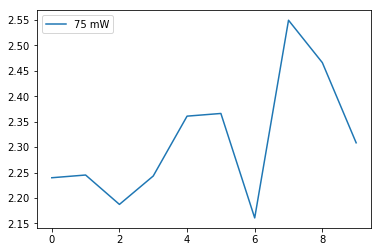

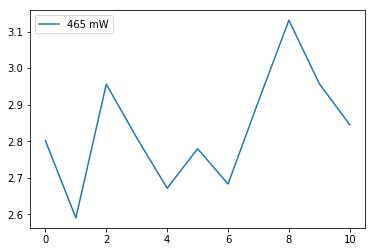

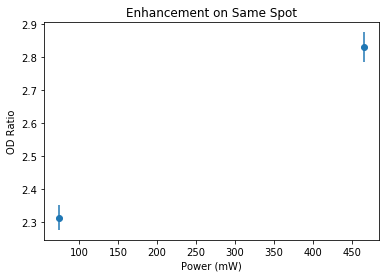

In [11]:
avg = []
err = []
for _en,_p in zip(enhancement,power):
    plt.figure()
    plt.plot(_en,label='{} mW'.format(_p))
    plt.legend(loc='best')
    avg.append(np.array(_en).mean())
    err.append(np.array(_en).std()/np.sqrt(len(_en)))

plt.figure()
plt.title('Enhancement on Same Spot')
plt.xlabel('Power (mW)')
plt.ylabel('OD Ratio')
plt.errorbar(power,avg,yerr=err,marker='o',linestyle='None')

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

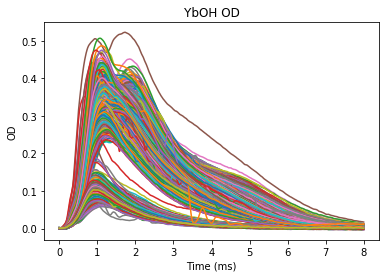

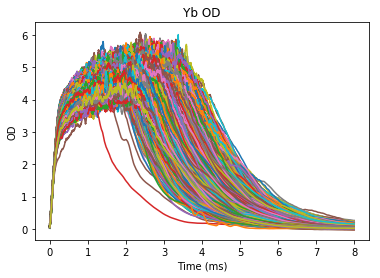

In [7]:
folder = '20190308'
skips = []
ABAB = True

start_stop = [
    [436,513],
    [514,569],
    [570,610],
    [611,660],
    [661,705],
    [706,760],
    [762,838],
    [839,896],
    [897,946],
    [949,993],
    [994,1053],
    [1054,1092],
    [1093,1107]
]

label_2 = [
    'gas crank in middle',
    'new 6.8sccm',
    'new',
    'new 9sccm',
    'new',
    'same 4.9 sccm',
    'new',
    'new',
    'same 3 sccm',
    'new',
    'new',
    'new',
    'new'
]

en_sccm = []
b_sccm = []
ub_sccm = []

for i in range(len(start_stop)):
    start,stop = start_stop[i]
    ODs_1 = calculateSeriesOD(folder,start,stop,skips,ABAB=ABAB)
    ODs_2 = calculateSeriesOD(folder,start+1,stop,skips,ABAB=ABAB)
    
    p_1 = processData(ODs_1,[0,8])
    p_2 = processData(ODs_2,[0,8])
    b,ub = identifyBUB(p_1,p_2,equal=True)
    b_sccm.append(b)
    ub_sccm.append(ub)
    _en = calcEnhancement(b[0],ub[0])
    en_sccm.append(_en)
#p=YbOH integrated, Yb integrated, timestamp

A Jupyter Widget

A Jupyter Widget

Mean =  1.2250965751178
STD =  0.1053542838634138


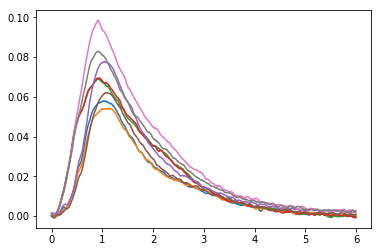

In [25]:
blocked = ODs_1[0]
unblocked = ODs_1[1]
int_b=integrateODSeries(blocked[0],blocked[-1],start_stop=[0,6])
int_ub=integrateODSeries(unblocked[0],unblocked[-1],start_stop=[0,6])
enhancements = calcEnhancement(int_b,int_ub)
en = np.array(enhancements)
print('Mean = ',en.mean())
print('STD = ',en.std())

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

18
18
18
18
18
18
18
18


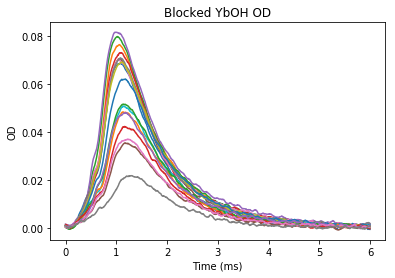

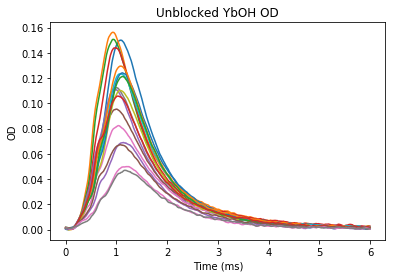

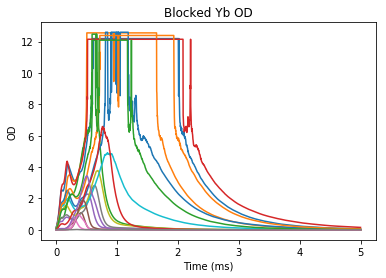

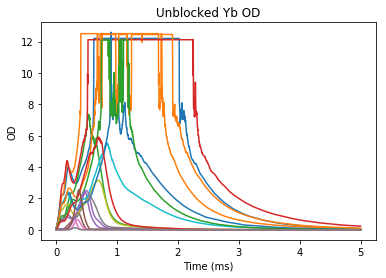

In [3]:
freq=[6563,6522,6458,6578,6716,6806,6905,6677,6653,6614,6596,6548,6515,6477,6405,6333,6291,6231]

start_stop_YbOH_blocked = [0,6]
start_stop_YbOH_unblocked = [0,6]
start_stop_Yb_blocked = [0,5]
start_stop_Yb_unblocked = [0,5]
data = processIVData(*ODs_208,freq,start_stop_YbOH_blocked,start_stop_YbOH_unblocked,start_stop_Yb_blocked,start_stop_Yb_unblocked)
YbOH_enhancement = data[0]
Yb_enhancement = data[1]
YbOH_int = data[-2]
freq = data[2]

Text(0,0.5,'Integrated OD Ratio')

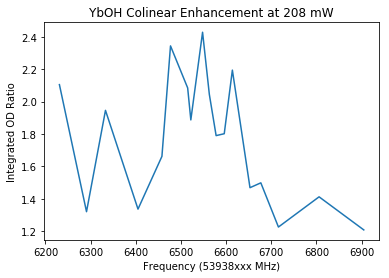

In [13]:
plt.plot(freq,YbOH_enhancement)
plt.xlabel('Frequency (53938xxx MHz)')
plt.title('YbOH Colinear Enhancement at 208 mW')
plt.ylabel('Integrated OD Ratio')

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

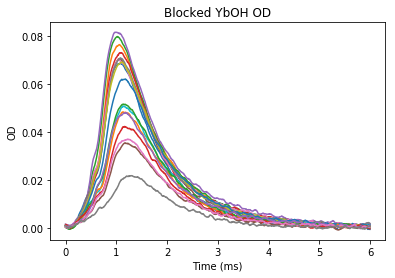

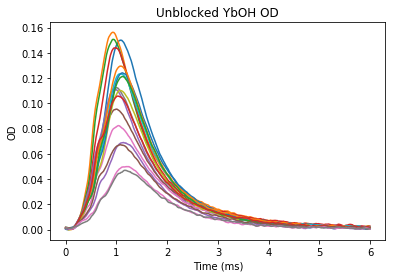

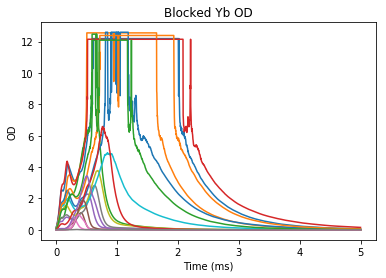

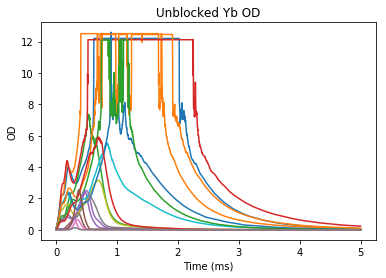

In [14]:
blocked,unblocked = process_BUB(*ODs_208,start_stop_YbOH_blocked,start_stop_YbOH_unblocked,start_stop_Yb_blocked,start_stop_Yb_unblocked)

In [16]:
b_YbOH = blocked[0]
ub_YbOH = unblocked[0]

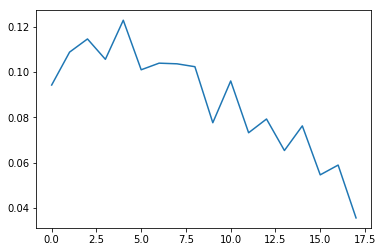

In [17]:
plt.plot(b_YbOH)

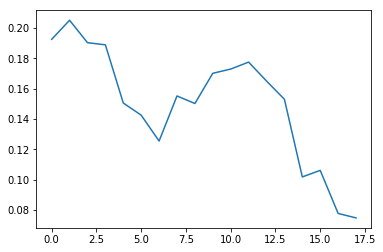

In [18]:
plt.plot(ub_YbOH)

In [19]:
enhance = [ub/b for ub,b in zip(ub_YbOH,b_YbOH)]

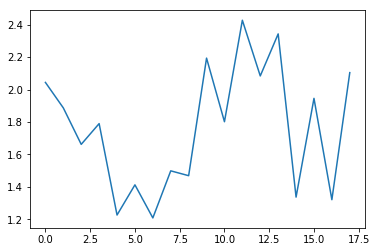

In [20]:
plt.plot(enhance)

In [21]:
bch1,ch2,bparams = calculateSingleOD(folder,3)

0.089838

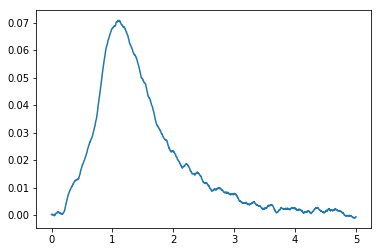

In [24]:
sliceIntegrate(bch1,timeArray(bparams),[0,5],1)

0.395341

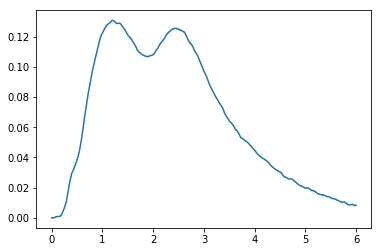

In [27]:
uch1,ch2,uparams = calculateSingleOD('20190226',5072)
sliceIntegrate(uch1,timeArray(uparams),[0,6],1)

0.399509

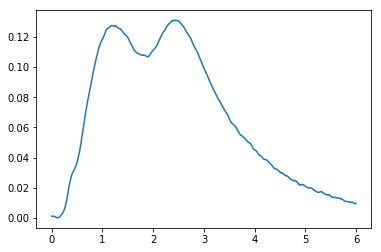

In [28]:
uch1,ch2,uparams = calculateSingleOD('20190226',5070)
sliceIntegrate(uch1,timeArray(uparams),[0,6],1)

0.093257

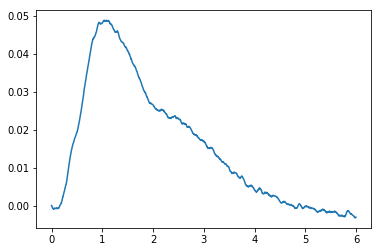

In [32]:
uch1,ch2,uparams = calculateSingleOD('20190226',5020)
sliceIntegrate(uch1,timeArray(uparams),[0,6],1)

In [39]:
uch1,ch2,uparams = calculateSingleOD('20190226',3429)
sliceIntegrate(uch1,timeArray(uparams),[0,6],1)

ValueError: Some errors were detected !
    Line #7234 (got 2 columns instead of 2)
    Line #7237 (got 2 columns instead of 2)
    Line #7239 (got 2 columns instead of 2)
    Line #7241 (got 2 columns instead of 2)
    Line #7243 (got 2 columns instead of 2)
    Line #7246 (got 2 columns instead of 2)
    Line #7252 (got 2 columns instead of 2)
    Line #7254 (got 2 columns instead of 2)
    Line #7256 (got 2 columns instead of 2)
    Line #7258 (got 1 columns instead of 2)
    Line #7259 (got 2 columns instead of 2)
    Line #7274 (got 1 columns instead of 2)
    Line #7289 (got 1 columns instead of 2)
    Line #7292 (got 1 columns instead of 2)
    Line #7295 (got 1 columns instead of 2)
    Line #7296 (got 2 columns instead of 2)
    Line #7297 (got 1 columns instead of 2)
    Line #7298 (got 1 columns instead of 2)
    Line #7302 (got 1 columns instead of 2)
    Line #7303 (got 2 columns instead of 2)
    Line #7315 (got 2 columns instead of 2)
    Line #7317 (got 2 columns instead of 2)
    Line #7318 (got 1 columns instead of 2)
    Line #7320 (got 2 columns instead of 2)
    Line #7324 (got 2 columns instead of 2)
    Line #7325 (got 1 columns instead of 2)
    Line #7327 (got 1 columns instead of 2)
    Line #7334 (got 2 columns instead of 2)
    Line #7337 (got 2 columns instead of 2)
    Line #7340 (got 2 columns instead of 2)
    Line #7341 (got 2 columns instead of 2)
    Line #7342 (got 2 columns instead of 2)
    Line #7344 (got 2 columns instead of 2)
    Line #7348 (got 2 columns instead of 2)
    Line #7349 (got 2 columns instead of 2)
    Line #7350 (got 1 columns instead of 2)
    Line #7351 (got 2 columns instead of 2)
    Line #7355 (got 1 columns instead of 2)
    Line #7359 (got 1 columns instead of 2)
    Line #7365 (got 1 columns instead of 2)
    Line #7367 (got 1 columns instead of 2)
    Line #7374 (got 1 columns instead of 2)
    Line #7377 (got 1 columns instead of 2)
    Line #7380 (got 1 columns instead of 2)
    Line #7386 (got 1 columns instead of 2)
    Line #7402 (got 2 columns instead of 2)
    Line #7403 (got 2 columns instead of 2)
    Line #7405 (got 2 columns instead of 2)
    Line #7414 (got 1 columns instead of 2)
    Line #7423 (got 1 columns instead of 2)
    Line #7430 (got 2 columns instead of 2)
    Line #7447 (got 1 columns instead of 2)
    Line #7449 (got 1 columns instead of 2)
    Line #7451 (got 1 columns instead of 2)
    Line #7453 (got 1 columns instead of 2)
    Line #7455 (got 1 columns instead of 2)
    Line #7456 (got 1 columns instead of 2)
    Line #7458 (got 1 columns instead of 2)
    Line #7459 (got 1 columns instead of 2)
    Line #7460 (got 1 columns instead of 2)
    Line #7461 (got 2 columns instead of 2)
    Line #7462 (got 2 columns instead of 2)
    Line #7463 (got 1 columns instead of 2)
    Line #7464 (got 1 columns instead of 2)
    Line #7465 (got 2 columns instead of 2)
    Line #7466 (got 1 columns instead of 2)
    Line #7467 (got 1 columns instead of 2)
    Line #7468 (got 2 columns instead of 2)
    Line #7469 (got 2 columns instead of 2)
    Line #7470 (got 1 columns instead of 2)
    Line #7471 (got 2 columns instead of 2)
    Line #7473 (got 1 columns instead of 2)
    Line #7474 (got 1 columns instead of 2)
    Line #7475 (got 2 columns instead of 2)
    Line #7477 (got 1 columns instead of 2)
    Line #7478 (got 1 columns instead of 2)
    Line #7480 (got 1 columns instead of 2)
    Line #7482 (got 1 columns instead of 2)
    Line #7483 (got 2 columns instead of 2)
    Line #7484 (got 1 columns instead of 2)
    Line #7485 (got 1 columns instead of 2)
    Line #7486 (got 1 columns instead of 2)
    Line #7488 (got 1 columns instead of 2)
    Line #7490 (got 1 columns instead of 2)
    Line #7491 (got 1 columns instead of 2)
    Line #7493 (got 1 columns instead of 2)
    Line #7494 (got 1 columns instead of 2)
    Line #7496 (got 1 columns instead of 2)
    Line #7498 (got 1 columns instead of 2)
    Line #7499 (got 1 columns instead of 2)
    Line #7501 (got 1 columns instead of 2)
    Line #7503 (got 1 columns instead of 2)
    Line #7505 (got 1 columns instead of 2)
    Line #7507 (got 2 columns instead of 2)
    Line #7508 (got 2 columns instead of 2)
    Line #7509 (got 1 columns instead of 2)
    Line #7510 (got 2 columns instead of 2)
    Line #7511 (got 1 columns instead of 2)
    Line #7513 (got 1 columns instead of 2)
    Line #7519 (got 2 columns instead of 2)
    Line #7520 (got 2 columns instead of 2)
    Line #7521 (got 1 columns instead of 2)
    Line #7522 (got 2 columns instead of 2)
    Line #7523 (got 1 columns instead of 2)
    Line #7524 (got 2 columns instead of 2)
    Line #7525 (got 2 columns instead of 2)
    Line #7527 (got 2 columns instead of 2)
    Line #7532 (got 1 columns instead of 2)
    Line #7533 (got 2 columns instead of 2)
    Line #7536 (got 1 columns instead of 2)
    Line #7537 (got 2 columns instead of 2)
    Line #7540 (got 1 columns instead of 2)
    Line #7541 (got 2 columns instead of 2)
    Line #7544 (got 2 columns instead of 2)
    Line #7552 (got 2 columns instead of 2)
    Line #7553 (got 1 columns instead of 2)
    Line #7554 (got 1 columns instead of 2)
    Line #7555 (got 1 columns instead of 2)
    Line #7566 (got 1 columns instead of 2)
    Line #7568 (got 1 columns instead of 2)
    Line #7570 (got 2 columns instead of 2)
    Line #7576 (got 1 columns instead of 2)
    Line #7580 (got 2 columns instead of 2)
    Line #7584 (got 2 columns instead of 2)
    Line #7587 (got 1 columns instead of 2)
    Line #7588 (got 2 columns instead of 2)
    Line #7590 (got 1 columns instead of 2)
    Line #7591 (got 1 columns instead of 2)
    Line #7593 (got 1 columns instead of 2)
    Line #7594 (got 1 columns instead of 2)
    Line #7596 (got 2 columns instead of 2)
    Line #7597 (got 1 columns instead of 2)
    Line #7598 (got 2 columns instead of 2)
    Line #7599 (got 2 columns instead of 2)
    Line #7600 (got 1 columns instead of 2)
    Line #7602 (got 1 columns instead of 2)
    Line #7604 (got 2 columns instead of 2)
    Line #7606 (got 2 columns instead of 2)
    Line #7607 (got 1 columns instead of 2)
    Line #7608 (got 1 columns instead of 2)
    Line #7609 (got 2 columns instead of 2)
    Line #7613 (got 1 columns instead of 2)
    Line #7615 (got 2 columns instead of 2)
    Line #7618 (got 1 columns instead of 2)
    Line #7620 (got 2 columns instead of 2)
    Line #7622 (got 1 columns instead of 2)
    Line #7623 (got 1 columns instead of 2)
    Line #7625 (got 1 columns instead of 2)
    Line #7626 (got 1 columns instead of 2)
    Line #7628 (got 1 columns instead of 2)
    Line #7630 (got 1 columns instead of 2)
    Line #7631 (got 2 columns instead of 2)
    Line #7633 (got 1 columns instead of 2)
    Line #7634 (got 1 columns instead of 2)
    Line #7635 (got 1 columns instead of 2)
    Line #7636 (got 1 columns instead of 2)
    Line #7638 (got 1 columns instead of 2)
    Line #7639 (got 2 columns instead of 2)
    Line #7640 (got 1 columns instead of 2)
    Line #7641 (got 1 columns instead of 2)
    Line #7642 (got 2 columns instead of 2)
    Line #7647 (got 1 columns instead of 2)
    Line #7648 (got 1 columns instead of 2)
    Line #7659 (got 2 columns instead of 2)
    Line #7661 (got 2 columns instead of 2)
    Line #7664 (got 1 columns instead of 2)
    Line #7665 (got 1 columns instead of 2)
    Line #7668 (got 1 columns instead of 2)
    Line #7669 (got 1 columns instead of 2)
    Line #7670 (got 2 columns instead of 2)
    Line #7672 (got 2 columns instead of 2)
    Line #7674 (got 2 columns instead of 2)
    Line #7675 (got 1 columns instead of 2)
    Line #7677 (got 2 columns instead of 2)
    Line #7681 (got 2 columns instead of 2)
    Line #7682 (got 1 columns instead of 2)
    Line #7685 (got 1 columns instead of 2)
    Line #7686 (got 2 columns instead of 2)
    Line #7687 (got 2 columns instead of 2)
    Line #7688 (got 1 columns instead of 2)
    Line #7690 (got 2 columns instead of 2)
    Line #7691 (got 1 columns instead of 2)
    Line #7692 (got 1 columns instead of 2)
    Line #7693 (got 2 columns instead of 2)
    Line #7694 (got 2 columns instead of 2)
    Line #7695 (got 1 columns instead of 2)
    Line #7696 (got 2 columns instead of 2)
    Line #7697 (got 2 columns instead of 2)
    Line #7698 (got 2 columns instead of 2)
    Line #7700 (got 1 columns instead of 2)
    Line #7701 (got 2 columns instead of 2)
    Line #7703 (got 2 columns instead of 2)
    Line #7705 (got 2 columns instead of 2)
    Line #7707 (got 2 columns instead of 2)
    Line #7708 (got 2 columns instead of 2)
    Line #7710 (got 2 columns instead of 2)
    Line #7714 (got 2 columns instead of 2)
    Line #7715 (got 1 columns instead of 2)
    Line #7716 (got 1 columns instead of 2)
    Line #7717 (got 1 columns instead of 2)
    Line #7719 (got 1 columns instead of 2)
    Line #7720 (got 1 columns instead of 2)
    Line #7721 (got 2 columns instead of 2)
    Line #7722 (got 1 columns instead of 2)
    Line #7723 (got 1 columns instead of 2)
    Line #7724 (got 1 columns instead of 2)
    Line #7726 (got 1 columns instead of 2)
    Line #7727 (got 1 columns instead of 2)
    Line #7729 (got 1 columns instead of 2)
    Line #7731 (got 1 columns instead of 2)
    Line #7732 (got 1 columns instead of 2)
    Line #7733 (got 1 columns instead of 2)
    Line #7735 (got 1 columns instead of 2)
    Line #7736 (got 1 columns instead of 2)
    Line #7737 (got 2 columns instead of 2)
    Line #7740 (got 1 columns instead of 2)
    Line #7741 (got 1 columns instead of 2)
    Line #7745 (got 1 columns instead of 2)
    Line #7746 (got 1 columns instead of 2)
    Line #7748 (got 1 columns instead of 2)
    Line #7751 (got 1 columns instead of 2)
    Line #7752 (got 2 columns instead of 2)
    Line #7753 (got 1 columns instead of 2)
    Line #7756 (got 1 columns instead of 2)
    Line #7764 (got 1 columns instead of 2)
    Line #7767 (got 1 columns instead of 2)
    Line #7769 (got 1 columns instead of 2)
    Line #7770 (got 2 columns instead of 2)
    Line #7771 (got 1 columns instead of 2)
    Line #7775 (got 1 columns instead of 2)
    Line #7777 (got 1 columns instead of 2)
    Line #7778 (got 2 columns instead of 2)
    Line #7779 (got 1 columns instead of 2)
    Line #7782 (got 1 columns instead of 2)
    Line #7783 (got 1 columns instead of 2)
    Line #7785 (got 1 columns instead of 2)
    Line #7786 (got 1 columns instead of 2)
    Line #7789 (got 1 columns instead of 2)
    Line #7793 (got 1 columns instead of 2)
    Line #7796 (got 1 columns instead of 2)
    Line #7814 (got 1 columns instead of 2)
    Line #7816 (got 1 columns instead of 2)
    Line #7818 (got 1 columns instead of 2)
    Line #7820 (got 2 columns instead of 2)
    Line #7821 (got 1 columns instead of 2)
    Line #7823 (got 1 columns instead of 2)
    Line #7824 (got 2 columns instead of 2)
    Line #7825 (got 2 columns instead of 2)
    Line #7826 (got 2 columns instead of 2)
    Line #7828 (got 1 columns instead of 2)
    Line #7829 (got 2 columns instead of 2)
    Line #7830 (got 2 columns instead of 2)
    Line #7832 (got 1 columns instead of 2)
    Line #7834 (got 1 columns instead of 2)
    Line #7837 (got 2 columns instead of 2)
    Line #7839 (got 1 columns instead of 2)
    Line #7840 (got 2 columns instead of 2)
    Line #7842 (got 1 columns instead of 2)
    Line #7843 (got 2 columns instead of 2)
    Line #7846 (got 1 columns instead of 2)
    Line #7847 (got 1 columns instead of 2)
    Line #7850 (got 1 columns instead of 2)
    Line #7851 (got 2 columns instead of 2)
    Line #7853 (got 1 columns instead of 2)
    Line #7854 (got 2 columns instead of 2)
    Line #7856 (got 1 columns instead of 2)
    Line #7857 (got 1 columns instead of 2)
    Line #7858 (got 1 columns instead of 2)
    Line #7859 (got 2 columns instead of 2)
    Line #7860 (got 1 columns instead of 2)
    Line #7861 (got 1 columns instead of 2)
    Line #7862 (got 1 columns instead of 2)
    Line #7863 (got 1 columns instead of 2)
    Line #7864 (got 2 columns instead of 2)
    Line #7867 (got 1 columns instead of 2)
    Line #7868 (got 1 columns instead of 2)
    Line #7871 (got 2 columns instead of 2)
    Line #7872 (got 1 columns instead of 2)
    Line #7873 (got 1 columns instead of 2)
    Line #7874 (got 1 columns instead of 2)
    Line #7877 (got 1 columns instead of 2)
    Line #7880 (got 2 columns instead of 2)
    Line #7881 (got 1 columns instead of 2)
    Line #7883 (got 2 columns instead of 2)
    Line #7885 (got 1 columns instead of 2)
    Line #7887 (got 1 columns instead of 2)
    Line #7890 (got 1 columns instead of 2)
    Line #7892 (got 1 columns instead of 2)
    Line #7893 (got 1 columns instead of 2)
    Line #7894 (got 2 columns instead of 2)
    Line #7896 (got 1 columns instead of 2)
    Line #7898 (got 1 columns instead of 2)
    Line #7899 (got 1 columns instead of 2)
    Line #7902 (got 1 columns instead of 2)
    Line #7906 (got 2 columns instead of 2)
    Line #7907 (got 1 columns instead of 2)
    Line #7908 (got 1 columns instead of 2)
    Line #7913 (got 2 columns instead of 2)
    Line #7914 (got 1 columns instead of 2)
    Line #7920 (got 2 columns instead of 2)
    Line #7921 (got 1 columns instead of 2)
    Line #7922 (got 2 columns instead of 2)
    Line #7923 (got 1 columns instead of 2)
    Line #7926 (got 1 columns instead of 2)
    Line #7931 (got 1 columns instead of 2)
    Line #7935 (got 1 columns instead of 2)
    Line #7942 (got 1 columns instead of 2)
    Line #7947 (got 2 columns instead of 2)
    Line #7958 (got 2 columns instead of 2)
    Line #7965 (got 2 columns instead of 2)
    Line #7982 (got 2 columns instead of 2)
    Line #7993 (got 2 columns instead of 2)
    Line #8004 (got 2 columns instead of 2)
    Line #8018 (got 1 columns instead of 2)
    Line #8019 (got 1 columns instead of 2)
    Line #8042 (got 2 columns instead of 2)
    Line #8044 (got 2 columns instead of 2)
    Line #8045 (got 2 columns instead of 2)
    Line #8048 (got 2 columns instead of 2)
    Line #8051 (got 2 columns instead of 2)
    Line #8060 (got 2 columns instead of 2)
    Line #8062 (got 2 columns instead of 2)
    Line #8064 (got 2 columns instead of 2)
    Line #8066 (got 1 columns instead of 2)
    Line #8069 (got 2 columns instead of 2)
    Line #8072 (got 2 columns instead of 2)
    Line #8074 (got 1 columns instead of 2)
    Line #8075 (got 2 columns instead of 2)
    Line #8077 (got 1 columns instead of 2)
    Line #8078 (got 2 columns instead of 2)
    Line #8079 (got 1 columns instead of 2)
    Line #8081 (got 1 columns instead of 2)
    Line #8082 (got 2 columns instead of 2)
    Line #8084 (got 1 columns instead of 2)
    Line #8086 (got 1 columns instead of 2)
    Line #8087 (got 1 columns instead of 2)
    Line #8089 (got 1 columns instead of 2)
    Line #8090 (got 1 columns instead of 2)
    Line #8091 (got 1 columns instead of 2)
    Line #8092 (got 2 columns instead of 2)
    Line #8093 (got 1 columns instead of 2)
    Line #8097 (got 1 columns instead of 2)
    Line #8098 (got 1 columns instead of 2)
    Line #8099 (got 1 columns instead of 2)
    Line #8100 (got 1 columns instead of 2)
    Line #8101 (got 1 columns instead of 2)
    Line #8103 (got 1 columns instead of 2)
    Line #8104 (got 1 columns instead of 2)
    Line #8106 (got 1 columns instead of 2)
    Line #8107 (got 1 columns instead of 2)
    Line #8114 (got 1 columns instead of 2)
    Line #8116 (got 1 columns instead of 2)
    Line #8117 (got 2 columns instead of 2)
    Line #8118 (got 1 columns instead of 2)
    Line #8120 (got 2 columns instead of 2)
    Line #8122 (got 1 columns instead of 2)
    Line #8123 (got 1 columns instead of 2)
    Line #8125 (got 1 columns instead of 2)
    Line #8126 (got 1 columns instead of 2)
    Line #8127 (got 1 columns instead of 2)
    Line #8129 (got 1 columns instead of 2)
    Line #8130 (got 1 columns instead of 2)
    Line #8131 (got 1 columns instead of 2)
    Line #8132 (got 1 columns instead of 2)
    Line #8133 (got 2 columns instead of 2)
    Line #8134 (got 1 columns instead of 2)
    Line #8135 (got 2 columns instead of 2)
    Line #8136 (got 1 columns instead of 2)
    Line #8137 (got 1 columns instead of 2)
    Line #8141 (got 1 columns instead of 2)
    Line #8145 (got 2 columns instead of 2)
    Line #8147 (got 2 columns instead of 2)
    Line #8149 (got 1 columns instead of 2)
    Line #8150 (got 2 columns instead of 2)
    Line #8151 (got 2 columns instead of 2)
    Line #8153 (got 2 columns instead of 2)
    Line #8158 (got 2 columns instead of 2)
    Line #8159 (got 1 columns instead of 2)
    Line #8161 (got 1 columns instead of 2)
    Line #8163 (got 1 columns instead of 2)
    Line #8166 (got 1 columns instead of 2)
    Line #8167 (got 2 columns instead of 2)
    Line #8170 (got 2 columns instead of 2)
    Line #8173 (got 1 columns instead of 2)
    Line #8175 (got 1 columns instead of 2)
    Line #8176 (got 2 columns instead of 2)
    Line #8179 (got 1 columns instead of 2)
    Line #8180 (got 2 columns instead of 2)
    Line #8181 (got 1 columns instead of 2)
    Line #8184 (got 1 columns instead of 2)
    Line #8188 (got 1 columns instead of 2)
    Line #8190 (got 1 columns instead of 2)
    Line #8191 (got 2 columns instead of 2)
    Line #8198 (got 1 columns instead of 2)
    Line #8199 (got 1 columns instead of 2)
    Line #8201 (got 1 columns instead of 2)
    Line #8202 (got 2 columns instead of 2)
    Line #8204 (got 1 columns instead of 2)
    Line #8206 (got 1 columns instead of 2)
    Line #8210 (got 1 columns instead of 2)
    Line #8212 (got 2 columns instead of 2)
    Line #8213 (got 1 columns instead of 2)
    Line #8215 (got 1 columns instead of 2)
    Line #8218 (got 1 columns instead of 2)
    Line #8220 (got 1 columns instead of 2)
    Line #8222 (got 2 columns instead of 2)
    Line #8223 (got 1 columns instead of 2)
    Line #8226 (got 1 columns instead of 2)
    Line #8231 (got 2 columns instead of 2)
    Line #8236 (got 1 columns instead of 2)
    Line #8238 (got 1 columns instead of 2)
    Line #8239 (got 1 columns instead of 2)
    Line #8241 (got 1 columns instead of 2)
    Line #8243 (got 1 columns instead of 2)
    Line #8244 (got 2 columns instead of 2)
    Line #8245 (got 1 columns instead of 2)
    Line #8246 (got 1 columns instead of 2)
    Line #8248 (got 1 columns instead of 2)
    Line #8250 (got 1 columns instead of 2)
    Line #8251 (got 1 columns instead of 2)
    Line #8252 (got 1 columns instead of 2)
    Line #8256 (got 1 columns instead of 2)
    Line #8257 (got 1 columns instead of 2)
    Line #8258 (got 1 columns instead of 2)
    Line #8261 (got 1 columns instead of 2)
    Line #8262 (got 1 columns instead of 2)
    Line #8263 (got 1 columns instead of 2)
    Line #8266 (got 2 columns instead of 2)
    Line #8268 (got 1 columns instead of 2)
    Line #8270 (got 1 columns instead of 2)
    Line #8271 (got 1 columns instead of 2)
    Line #8273 (got 1 columns instead of 2)
    Line #8274 (got 1 columns instead of 2)
    Line #8277 (got 1 columns instead of 2)
    Line #8278 (got 2 columns instead of 2)
    Line #8279 (got 1 columns instead of 2)
    Line #8281 (got 1 columns instead of 2)
    Line #8283 (got 1 columns instead of 2)
    Line #8288 (got 1 columns instead of 2)
    Line #8289 (got 1 columns instead of 2)
    Line #8290 (got 1 columns instead of 2)
    Line #8294 (got 1 columns instead of 2)
    Line #8296 (got 1 columns instead of 2)
    Line #8297 (got 1 columns instead of 2)
    Line #8299 (got 1 columns instead of 2)
    Line #8301 (got 1 columns instead of 2)
    Line #8302 (got 1 columns instead of 2)
    Line #8304 (got 1 columns instead of 2)
    Line #8306 (got 1 columns instead of 2)
    Line #8308 (got 1 columns instead of 2)
    Line #8309 (got 1 columns instead of 2)
    Line #8311 (got 1 columns instead of 2)
    Line #8313 (got 1 columns instead of 2)
    Line #8315 (got 1 columns instead of 2)
    Line #8327 (got 1 columns instead of 2)
    Line #8329 (got 2 columns instead of 2)
    Line #8333 (got 2 columns instead of 2)
    Line #8336 (got 1 columns instead of 2)
    Line #8337 (got 2 columns instead of 2)
    Line #8339 (got 1 columns instead of 2)
    Line #8341 (got 1 columns instead of 2)
    Line #8342 (got 2 columns instead of 2)
    Line #8344 (got 1 columns instead of 2)
    Line #8346 (got 1 columns instead of 2)
    Line #8348 (got 1 columns instead of 2)
    Line #8352 (got 2 columns instead of 2)
    Line #8355 (got 2 columns instead of 2)
    Line #8357 (got 2 columns instead of 2)
    Line #8360 (got 2 columns instead of 2)
    Line #8362 (got 2 columns instead of 2)
    Line #8364 (got 2 columns instead of 2)
    Line #8370 (got 1 columns instead of 2)
    Line #8372 (got 1 columns instead of 2)
    Line #8373 (got 1 columns instead of 2)
    Line #8377 (got 1 columns instead of 2)
    Line #8387 (got 2 columns instead of 2)
    Line #8389 (got 2 columns instead of 2)
    Line #8391 (got 2 columns instead of 2)
    Line #8392 (got 2 columns instead of 2)
    Line #8394 (got 2 columns instead of 2)
    Line #8395 (got 2 columns instead of 2)
    Line #8397 (got 2 columns instead of 2)
    Line #8398 (got 2 columns instead of 2)
    Line #8400 (got 2 columns instead of 2)
    Line #8401 (got 2 columns instead of 2)
    Line #8402 (got 2 columns instead of 2)
    Line #8404 (got 2 columns instead of 2)
    Line #8405 (got 2 columns instead of 2)
    Line #8406 (got 2 columns instead of 2)
    Line #8431 (got 2 columns instead of 2)
    Line #8433 (got 2 columns instead of 2)
    Line #8436 (got 2 columns instead of 2)
    Line #8439 (got 1 columns instead of 2)
    Line #8443 (got 1 columns instead of 2)
    Line #8445 (got 2 columns instead of 2)
    Line #8448 (got 1 columns instead of 2)
    Line #8457 (got 1 columns instead of 2)
    Line #8460 (got 1 columns instead of 2)
    Line #8464 (got 1 columns instead of 2)
    Line #8466 (got 2 columns instead of 2)
    Line #8480 (got 1 columns instead of 2)
    Line #8482 (got 1 columns instead of 2)
    Line #8484 (got 1 columns instead of 2)
    Line #8485 (got 2 columns instead of 2)
    Line #8486 (got 1 columns instead of 2)
    Line #8487 (got 1 columns instead of 2)
    Line #8489 (got 1 columns instead of 2)
    Line #8490 (got 2 columns instead of 2)
    Line #8493 (got 1 columns instead of 2)
    Line #8494 (got 1 columns instead of 2)
    Line #8496 (got 1 columns instead of 2)
    Line #8497 (got 2 columns instead of 2)
    Line #8498 (got 1 columns instead of 2)
    Line #8500 (got 1 columns instead of 2)
    Line #8501 (got 2 columns instead of 2)
    Line #8503 (got 1 columns instead of 2)
    Line #8507 (got 1 columns instead of 2)
    Line #8511 (got 1 columns instead of 2)
    Line #8520 (got 1 columns instead of 2)
    Line #8524 (got 1 columns instead of 2)
    Line #8534 (got 1 columns instead of 2)
    Line #8537 (got 2 columns instead of 2)
    Line #8548 (got 1 columns instead of 2)
    Line #8551 (got 1 columns instead of 2)
    Line #8552 (got 2 columns instead of 2)
    Line #8554 (got 1 columns instead of 2)
    Line #8555 (got 1 columns instead of 2)
    Line #8557 (got 1 columns instead of 2)
    Line #8558 (got 1 columns instead of 2)
    Line #8559 (got 2 columns instead of 2)
    Line #8560 (got 1 columns instead of 2)
    Line #8562 (got 1 columns instead of 2)
    Line #8564 (got 1 columns instead of 2)
    Line #8566 (got 1 columns instead of 2)
    Line #8567 (got 2 columns instead of 2)
    Line #8568 (got 2 columns instead of 2)
    Line #8572 (got 1 columns instead of 2)
    Line #8573 (got 2 columns instead of 2)
    Line #8574 (got 2 columns instead of 2)
    Line #8575 (got 2 columns instead of 2)
    Line #8576 (got 2 columns instead of 2)
    Line #8577 (got 2 columns instead of 2)
    Line #8579 (got 1 columns instead of 2)
    Line #8584 (got 1 columns instead of 2)
    Line #8586 (got 1 columns instead of 2)
    Line #8587 (got 1 columns instead of 2)
    Line #8590 (got 1 columns instead of 2)
    Line #8593 (got 2 columns instead of 2)
    Line #8594 (got 2 columns instead of 2)
    Line #8607 (got 1 columns instead of 2)
    Line #8608 (got 1 columns instead of 2)
    Line #8611 (got 1 columns instead of 2)
    Line #8615 (got 1 columns instead of 2)
    Line #8616 (got 1 columns instead of 2)
    Line #8618 (got 1 columns instead of 2)
    Line #8619 (got 2 columns instead of 2)
    Line #8625 (got 1 columns instead of 2)
    Line #8638 (got 1 columns instead of 2)
    Line #8641 (got 1 columns instead of 2)
    Line #8643 (got 2 columns instead of 2)
    Line #8645 (got 1 columns instead of 2)
    Line #8646 (got 2 columns instead of 2)
    Line #8647 (got 2 columns instead of 2)
    Line #8648 (got 1 columns instead of 2)
    Line #8650 (got 2 columns instead of 2)
    Line #8652 (got 1 columns instead of 2)
    Line #8654 (got 1 columns instead of 2)
    Line #8655 (got 2 columns instead of 2)
    Line #8656 (got 1 columns instead of 2)
    Line #8657 (got 1 columns instead of 2)
    Line #8659 (got 2 columns instead of 2)
    Line #8661 (got 1 columns instead of 2)
    Line #8662 (got 2 columns instead of 2)
    Line #8663 (got 2 columns instead of 2)
    Line #8664 (got 1 columns instead of 2)
    Line #8665 (got 2 columns instead of 2)
    Line #8666 (got 1 columns instead of 2)
    Line #8668 (got 1 columns instead of 2)
    Line #8673 (got 1 columns instead of 2)
    Line #8674 (got 2 columns instead of 2)
    Line #8676 (got 1 columns instead of 2)
    Line #8685 (got 2 columns instead of 2)
    Line #8687 (got 2 columns instead of 2)
    Line #8688 (got 2 columns instead of 2)
    Line #8692 (got 2 columns instead of 2)
    Line #8695 (got 2 columns instead of 2)
    Line #8698 (got 2 columns instead of 2)
    Line #8705 (got 1 columns instead of 2)
    Line #8721 (got 2 columns instead of 2)
    Line #8723 (got 1 columns instead of 2)
    Line #8724 (got 2 columns instead of 2)
    Line #8726 (got 2 columns instead of 2)
    Line #8728 (got 1 columns instead of 2)
    Line #8729 (got 2 columns instead of 2)
    Line #8731 (got 2 columns instead of 2)
    Line #8733 (got 2 columns instead of 2)
    Line #8735 (got 2 columns instead of 2)
    Line #8737 (got 1 columns instead of 2)
    Line #8738 (got 2 columns instead of 2)
    Line #8740 (got 2 columns instead of 2)
    Line #8757 (got 2 columns instead of 2)
    Line #8759 (got 2 columns instead of 2)
    Line #8761 (got 2 columns instead of 2)
    Line #8764 (got 2 columns instead of 2)
    Line #8766 (got 2 columns instead of 2)
    Line #8768 (got 2 columns instead of 2)
    Line #8770 (got 2 columns instead of 2)
    Line #8772 (got 2 columns instead of 2)
    Line #8777 (got 2 columns instead of 2)
    Line #8779 (got 2 columns instead of 2)
    Line #8781 (got 2 columns instead of 2)
    Line #8784 (got 2 columns instead of 2)
    Line #8787 (got 2 columns instead of 2)
    Line #8795 (got 1 columns instead of 2)
    Line #8796 (got 1 columns instead of 2)
    Line #8799 (got 1 columns instead of 2)
    Line #8800 (got 1 columns instead of 2)
    Line #8802 (got 1 columns instead of 2)
    Line #8810 (got 2 columns instead of 2)
    Line #8831 (got 1 columns instead of 2)
    Line #8832 (got 1 columns instead of 2)
    Line #8835 (got 1 columns instead of 2)
    Line #8836 (got 1 columns instead of 2)
    Line #8838 (got 1 columns instead of 2)
    Line #8839 (got 1 columns instead of 2)
    Line #8841 (got 1 columns instead of 2)
    Line #8842 (got 1 columns instead of 2)
    Line #8844 (got 1 columns instead of 2)
    Line #8875 (got 2 columns instead of 2)
    Line #8876 (got 2 columns instead of 2)
    Line #8877 (got 1 columns instead of 2)
    Line #8878 (got 2 columns instead of 2)
    Line #8885 (got 2 columns instead of 2)
    Line #8887 (got 2 columns instead of 2)
    Line #8894 (got 2 columns instead of 2)
    Line #8915 (got 2 columns instead of 2)
    Line #8917 (got 2 columns instead of 2)
    Line #8918 (got 2 columns instead of 2)
    Line #8920 (got 2 columns instead of 2)
    Line #8922 (got 2 columns instead of 2)
    Line #8924 (got 2 columns instead of 2)
    Line #8925 (got 2 columns instead of 2)
    Line #8927 (got 2 columns instead of 2)
    Line #8931 (got 2 columns instead of 2)
    Line #8934 (got 2 columns instead of 2)
    Line #8936 (got 2 columns instead of 2)
    Line #8940 (got 2 columns instead of 2)
    Line #8943 (got 1 columns instead of 2)
    Line #8952 (got 1 columns instead of 2)
    Line #8953 (got 1 columns instead of 2)
    Line #8954 (got 2 columns instead of 2)
    Line #8958 (got 1 columns instead of 2)
    Line #8959 (got 1 columns instead of 2)
    Line #8960 (got 2 columns instead of 2)
    Line #8963 (got 1 columns instead of 2)
    Line #8964 (got 1 columns instead of 2)
    Line #8965 (got 2 columns instead of 2)
    Line #8966 (got 1 columns instead of 2)
    Line #8967 (got 2 columns instead of 2)
    Line #8969 (got 1 columns instead of 2)
    Line #8970 (got 1 columns instead of 2)
    Line #8971 (got 2 columns instead of 2)
    Line #8972 (got 1 columns instead of 2)
    Line #8973 (got 2 columns instead of 2)
    Line #8974 (got 1 columns instead of 2)
    Line #8983 (got 2 columns instead of 2)
    Line #8986 (got 2 columns instead of 2)
    Line #8987 (got 2 columns instead of 2)
    Line #8988 (got 1 columns instead of 2)
    Line #9004 (got 2 columns instead of 2)
    Line #9006 (got 2 columns instead of 2)
    Line #9011 (got 2 columns instead of 2)
    Line #9012 (got 2 columns instead of 2)
    Line #9025 (got 2 columns instead of 2)
    Line #9029 (got 2 columns instead of 2)
    Line #9033 (got 1 columns instead of 2)
    Line #9037 (got 1 columns instead of 2)
    Line #9039 (got 1 columns instead of 2)
    Line #9041 (got 1 columns instead of 2)
    Line #9043 (got 1 columns instead of 2)
    Line #9059 (got 1 columns instead of 2)
    Line #9063 (got 1 columns instead of 2)
    Line #9073 (got 1 columns instead of 2)
    Line #9075 (got 1 columns instead of 2)
    Line #9078 (got 2 columns instead of 2)
    Line #9080 (got 2 columns instead of 2)
    Line #9081 (got 1 columns instead of 2)
    Line #9089 (got 1 columns instead of 2)
    Line #9091 (got 1 columns instead of 2)

In [1]:
for i in range(4):
    if i==2:
        continue
    print(i)

0
1
3


In [6]:
import numpy as np
x=np.array([1,2,3,4])

In [10]:
type(x)

numpy.ndarray

In [11]:
type([x])

list

In [12]:
type([])

list

In [13]:
len([])

0

In [19]:
x = [1,2]

In [21]:
if x:
    print(2)

2
